## Chronic Kidney Disease (CKD) with 100% Accuracy

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

**1. Title:** Early stage of Indians Chronic Kidney Disease(CKD)

**2. Relevant Information:**

    1. age          -	age	
    2. bp		-	blood pressure
	3. sg		-	specific gravity
	4. al		-   albumin
	5. su		-	sugar
	6. rbc		-	red blood cells
	7. pc		-	pus cell
	8. pcc		-	pus cell clumps
	9. ba		-	bacteria
	10. bgr		-	blood glucose random
	11. bu		-	blood urea
	12. sc		-	serum creatinine
	13. sod		-	sodium
	14. pot		-	potassium
	15. hemo	-	hemoglobin
	16. pcv		-	packed cell volume
	17. wc		-	white blood cell count
	18. rc		-	red blood cell count
	19. htn		-	hypertension
	20. dm		-	diabetes mellitus
	21. cad		-	coronary artery disease
	22. appet	-	appetite
	23. pe		-	pedal edema
	24. ane		-	anemia
	25. class	-	class	

**3. Number of Instances:**  400 (250 CKD, 150 notckd)

**4. Number of Attributes:** 24 + class = 25(11 numeric,14 nominal) 

**5. Attribute Information :**

	1. Age(numerical) : age in years
	2. Blood Pressure(numerical) : bp in mm/Hg
	3. Specific Gravity(nominal) : sg - (1.005,1.010,1.015,1.020,1.025)
	4. Albumin(nominal) : al - (0,1,2,3,4,5)
	5. Sugar(nominal) : su - (0,1,2,3,4,5)
	6. Red Blood Cells(nominal) : rbc - (normal,abnormal)
	7. Pus Cell (nominal) : pc - (normal,abnormal)
	8. Pus Cell clumps(nominal) : pcc - (present,notpresent)
	9. Bacteria(nominal) : ba  - (present,notpresent)
	10. Blood Glucose Random(numerical) : bgr in mgs/dl
	11. Blood Urea(numerical) : bu in mgs/dl
	12. Serum Creatinine(numerical) : sc in mgs/dl
	13. Sodium(numerical) : sod in mEq/L
	14. Potassium(numerical) : pot in mEq/L
	15. Hemoglobin(numerical) : hemo in gms
	16. Packed  Cell Volume(numerical)
	17. White Blood Cell Count(numerical) : wc in cells/cumm
	18. Red Blood Cell Count(numerical) : rc in millions/cmm
	19. Hypertension(nominal) : htn - (yes,no)
	20. Diabetes Mellitus(nominal) : dm - (yes,no)
	21. Coronary Artery Disease(nominal) : cad - (yes,no)
	22. Appetite(nominal) : appet - (good,poor)
	23. Pedal Edema(nominal) : pe - (yes,no)	
	24. Anemia(nominal) : ane- (yes,no)
	25. Class (nominal):  class- (ckd,notckd)
    

**6. Missing Attribute Values:** Yes

**7. Class Distribution:** ( 2 classes)

   		Class 	  Number of instances
   		ckd          	  250
   		notckd       	  150

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('kidney.csv')
data = df

In [3]:
df.shape

(400, 25)

In [4]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


## Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [6]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [7]:
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### Correlation matrix & Matrix Visualisation

In [8]:
df.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


In [9]:
# Let's find out how many of each class are

df['class'].value_counts()
# from below output we ca draw our inference that this is close to "imbalanced dataset"

ckd       250
notckd    150
Name: class, dtype: int64

In [10]:
#Representation of Target variable in Percentage

countNoDisease = len(df[df['class'] == 0])
countHaveDisease = len(df[df['class'] == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df['class']))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df['class']))*100)))

Percentage of Patients Haven't Heart Disease: 0.00%
Percentage of Patients Have Heart Disease: 0.00%


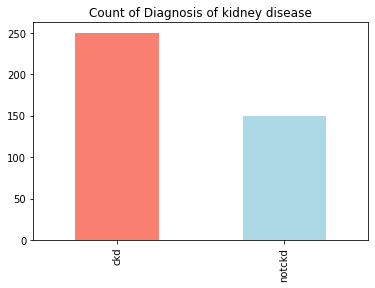

In [11]:
#Understanding the balancing of the data visually

df['class'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease");


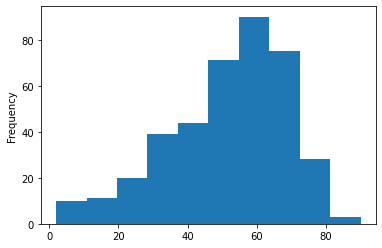

In [12]:
#Check the distribution of the age column with a histogram

df['age'].plot(kind='hist');

In [13]:
data['class'] = data['class'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})

In [14]:
data['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

Factors that may increase your risk of chronic kidney disease include:

- Diabetes - su(blood sugar), dm (diabetes mellitus)
- High blood pressure - BP
- Heart and blood vessel (cardiovascular) disease
- Smoking
- Obesity
- Being African-American, Native American or Asian-American
- Family history of kidney disease
- Abnormal kidney structure
- Older age - age

<AxesSubplot:>

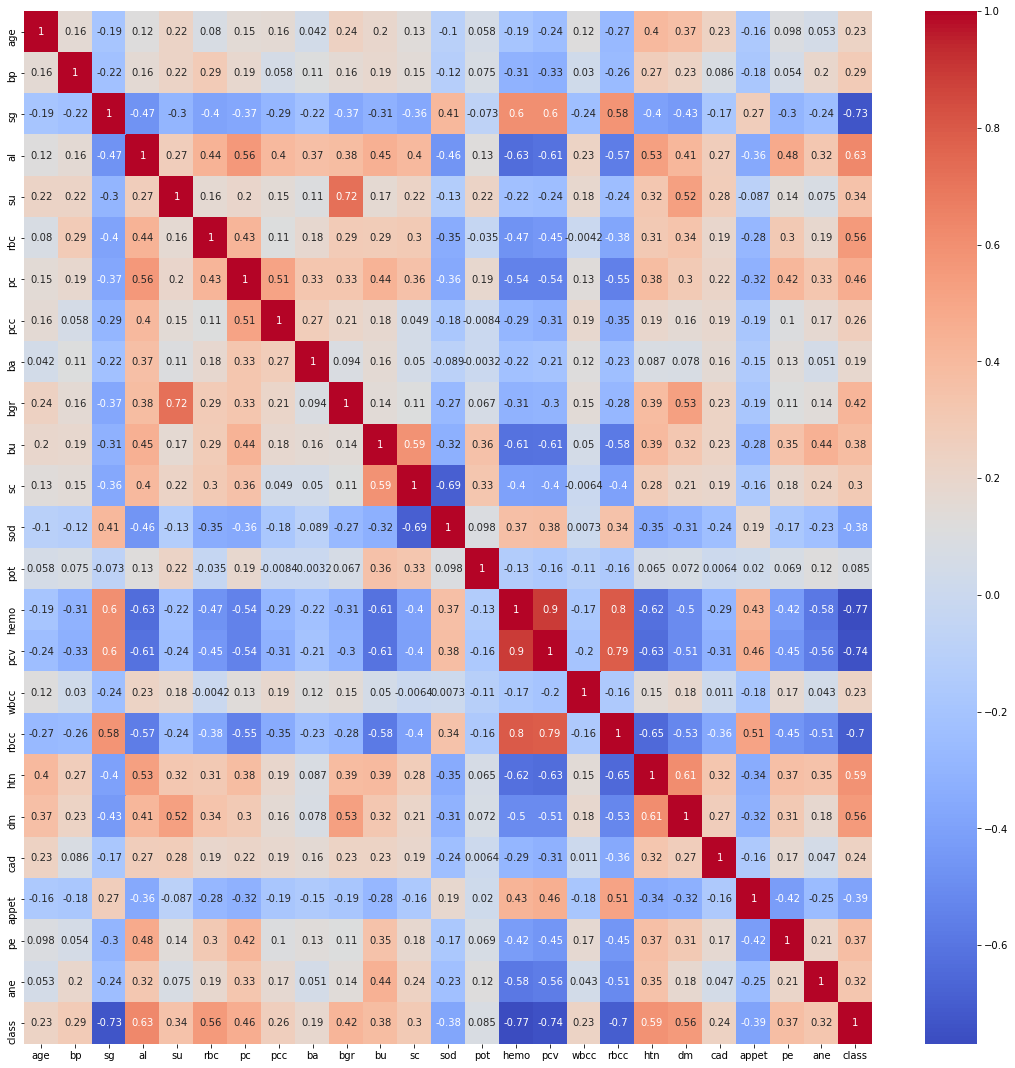

In [15]:
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row 

## EDA

In [16]:
data.shape

(400, 25)

In [17]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [18]:
data.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [19]:
data.shape[0], data.dropna().shape[0]

(400, 158)

We would only have 158 rows remaining if we drop the na columns.  One downside is that we reduce the overall power of our model when we feed in less data, and another is that we dont know if the fact that those values are null is related in some way to an additional variable.  If the latter is the case, throwing out that data could potentially skew our data.

I am going to drop in this case and see how the model performs.

Generally speaking in situations where we are providing patients with a diagnosis, we want to err on the side of false positives. In this specific case, a false negative would be telling a patient that is CKD-positive that they do not have CKD, and the result could be catastrophic if the mistake is not caught. This would be a "worse" mistake than telling someone who is CKD-negative that they have CKD, as they would be brought in for further testing and find out that they are actually CKD-negative

In [20]:
data.dropna(inplace=True)

In [21]:
data.shape

(158, 25)

## Modeling

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg = LogisticRegression()

In [24]:
X = data.iloc[:,:-1]
y = data['class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

In [26]:
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
#Training score

logreg.score(X_train,y_train)

1.0

In [28]:
#Testing accuracy

logreg.score(X_test,y_test)

1.0

In [29]:
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


### The cell below shows the coefficients for each variable.
(example on reading the coefficients from a Logistic Regression: a one unit increase in age makes an individual about e^0.14 time as likely to have ckd, while a one unit increase in blood pressure makes an individual about e^-0.07 times as likely to have ckd.

In [32]:
pd.DataFrame(logreg.coef_, columns=X.columns)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,0.181799,-0.071179,0.008242,0.493857,0.002138,0.016338,0.156339,0.001468,0.009586,0.185171,...,-0.295726,-0.748183,0.000658,-0.198692,0.151956,0.150426,0.00094,-0.003578,0.005742,0.001627


### Confusion Matrix

In [33]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


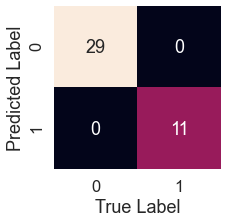

In [34]:
log_pred = logreg.predict(X_test)
plot_conf_mat(y_test, log_pred)

In [35]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 0
True Pos: 11


### K-Nearest Neighbors Classifier

I am going to balance the classes here before using KNN. Logistic regression was able to make accurate predictions even when trained on unbalanced classes, but KNN is more sensitive to unbalanced classes

In [36]:
df["class"].value_counts()

0    115
1     43
Name: class, dtype: int64

In [37]:
balanced_df = pd.concat([df[df["class"] == 0], df[df["class"] == 1].sample(n = 115, replace = True)], axis = 0)
balanced_df.reset_index(drop=True, inplace=True)

In [38]:
balanced_df["class"].value_counts()

1    115
0    115
Name: class, dtype: int64

In [39]:
X = balanced_df.drop("class", axis=1)
y = balanced_df["class"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [41]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()

params = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "leaf_size":[25,30,35],
    "p":[1,2]
}

gs = GridSearchCV(knn, param_grid=params)

model = gs.fit(X_train,y_train)

preds = model.predict(X_test)

accuracy_score(y_test, preds)

1.0

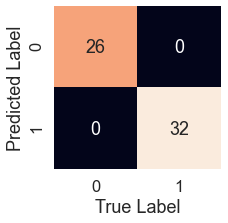

In [50]:
knn_pred = model.predict(X_test)
plot_conf_mat(y_test, knn_pred)

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 26
False Pos: 0
False Neg: 0
True Pos: 32


### Feature Importance

In [51]:
# These coef's tell how much and in what way did each one of it contribute to predicting the target variable

feature_dict=dict(zip(df.columns,list(logreg.coef_[0])))
feature_dict

#This is a type of Model driven Exploratory data analysis

{'age': 0.18179931104610256,
 'bp': -0.0711790134891355,
 'sg': 0.00824188595145099,
 'al': 0.4938571846085326,
 'su': 0.002137676301323849,
 'rbc': 0.01633770800545606,
 'pc': 0.1563394854870809,
 'pcc': 0.0014682503336332252,
 'ba': 0.009585910826613914,
 'bgr': 0.18517117766515193,
 'bu': 0.17074253417375773,
 'sc': 0.15169741851931318,
 'sod': -0.06397751129295486,
 'pot': 0.06915707119891382,
 'hemo': -0.29572595912988214,
 'pcv': -0.7481834765154958,
 'wbcc': 0.0006583682080663073,
 'rbcc': -0.19869166976643035,
 'htn': 0.15195597599023378,
 'dm': 0.1504256525816649,
 'cad': 0.0009399396478457842,
 'appet': -0.0035780287704673262,
 'pe': 0.005742010772175176,
 'ane': 0.0016272010227092876}

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Frequency'>

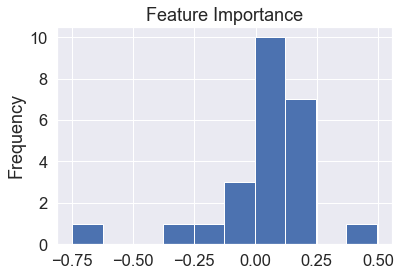

In [52]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="hist",legend=False,title="Feature Importance")

<AxesSubplot:title={'center':'Feature Importance'}>

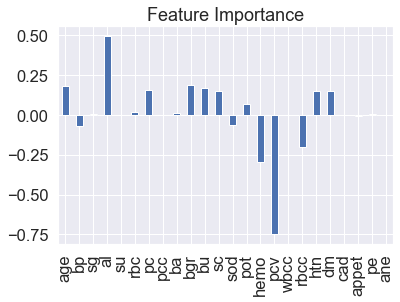

In [53]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

## Summary

In this project, I use Logistic Regression and K-Nearest Neighbors (KNN) to diagnose CKD. Both were able to classify patients with 100% accuracy.

KNN required class balancing, scaling, and model tuning to perform with 100% accuracy, while Logistic Regression was 100% accurate without tuning (note: still had to stratify the train test split). 

Logistic Regression is deemed a better model for this case, because in addition to being 100% accurate, it also allows us to quantify the impact of unit increases in specific variables on likelihood of having CKD.

## Saving model

In [55]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(logreg)
 
# Load the pickled model
logreg_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
logreg_from_pickle.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

### Another method

In [57]:
# create an iterator object with write permission - model.pkl
with open('kidney_disease_prediction.pkl', 'wb') as files:
    pickle.dump(logreg, files)

In [58]:
 # load saved model
with open('kidney_disease_prediction.pkl' , 'rb') as f:
    model = pickle.load(f)

In [59]:
# check prediction
# lr.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]) # similar

logreg.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [60]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32.0,4500.0,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16.0,11000.0,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24.0,9200.0,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1


In [63]:
# putting datapoints in the model it will either return 0 or 1 i.e. person having chronic kideny disease or not
logreg.predict([[48,80,1.02,1,0,1,0,1,1,2,0,0,1,1,0,1,1,2,0,0,1,0,1,2]]) 

array([1], dtype=int64)